#### ROUTE COLORS 
 - In this part of the work , we try to highlight the distinct routes for the given traceroute through out the data collection 

In [1]:
#import the necessary packages
import pandas as pd
import numpy  as np
import json
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import seaborn as sns
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
hfont = {'fontname':'Monaco'}

# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,4]
plt.rcParams['font.size'] =  13 

In [2]:
#print seaborn version
print('seaborn version: ', sns.__version__)

seaborn version:  0.13.0


In [3]:
#import the pickled dataframes you will be using for the experiments
latency_df = pd.read_pickle('traceroute.pickle')

#remove null values and anomalies 
latency_df['last_rtt'] = latency_df.groupby(latency_df.index)['avg_rtt'].transform('last')
latency_df = latency_df.dropna(subset=['last_rtt'])

#remove indexes where last_rtt is greater than 100ms 
latency_df = latency_df[latency_df['last_rtt'] < 100]
route_df = latency_df.copy()

In [4]:
#select one source and destination pair
route1_df = route_df[(route_df['prb_id'] == 33627) & (route_df['dst_id'] == '1004200')].copy()

#extract the first IP address from the hop_ip column into a new column
route1_df['unique_hop_ip'] = route1_df['hop_ip'].apply(lambda x: next((ip for ip in x if ip is not None), ''))

#count the hops in each index and add it to a route 
route1_df['hop_count'] = route1_df.groupby(route1_df.index)['unique_hop_ip'].transform('count')

In [5]:
grouped_ips = route1_df.groupby(level=0).agg({'unique_hop_ip': list, 'new_time': 'first', 'hop_count':'first', 'last_rtt': 'first'})
grouped_ips['color_id'] = pd.factorize(grouped_ips['unique_hop_ip'].apply(tuple))[0]
grouped_ips['color_id'].nunique()

29

In [6]:
#add a color number to match the number of unique colors needed
grouped_ips['color_id'].value_counts()

color_id
0     1998
3     1764
8     1497
19    1483
4       96
1       74
21      66
22      64
5       30
2       27
20      20
6       14
15       9
23       7
25       5
14       5
7        5
24       4
26       3
17       2
18       2
13       2
12       2
10       2
16       1
11       1
9        1
27       1
28       1
Name: count, dtype: int64

In [7]:
#add a color name to each color id

import matplotlib.colors as mcolors

#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = list(colors.keys())


#add a unique color to each color id 
grouped_ips['color'] = grouped_ips['color_id'].apply(lambda x: colors[x])
grouped_ips['color'].nunique()


29

In [8]:
#check mapping of color id to color name 
grouped_ips[['color_id','color']].drop_duplicates()

,color_id,color
30331,0,b
30338,1,g
30727,2,r
30802,3,c
30863,4,m
31007,5,y
32174,6,k
32238,7,w
32727,8,aliceblue
34176,9,antiquewhite


Text(0.5, 1.0, 'Barcelona to Canary Islands')

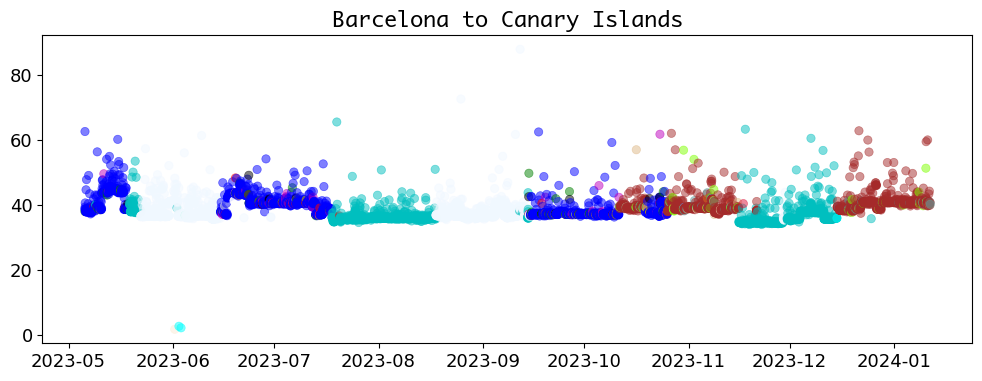

In [9]:
#plot the route
plt.scatter(grouped_ips['new_time'], grouped_ips['last_rtt'], c=grouped_ips['color'], cmap=None, linewidths=0.5, alpha=0.5)

#add title 
plt.title('Barcelona to Canary Islands', **hfont)

### SECOND PAIR 

In [10]:
#SUBSET THE DATAFRAME TO CHOOSE SELECTED ROUTES
#select one source and destination pair

route2_df = route_df[(route_df['prb_id'] == 51265) & (route_df['dst_id'] == '26072')].copy()
route2_df.head()

,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,dst_names,src_names,Hour,distance,hop,hop_ip,rtt,unique_ips,avg_rtt,last_rtt
121323,5080,2.6.2,43,1683307449,79.145.127.11,79.145.127.11,172.16.30.2,ICMP,4,48,...,Malaga,Mallorca,19,755.511519,1,"[172.16.30.1, 172.16.30.1, 172.16.30.1]","[0.837, 0.6, 0.547]",[172.16.30.1],0.661333,21.553333
121323,5080,2.6.2,43,1683307449,79.145.127.11,79.145.127.11,172.16.30.2,ICMP,4,48,...,Malaga,Mallorca,19,755.511519,2,"[192.168.144.1, 192.168.144.1, 192.168.144.1]","[1.873, 1.786, 1.606]",[192.168.144.1],1.755000,21.553333
121323,5080,2.6.2,43,1683307449,79.145.127.11,79.145.127.11,172.16.30.2,ICMP,4,48,...,Malaga,Mallorca,19,755.511519,3,"[81.41.222.5, 81.41.222.5, 81.41.222.5]","[5.702, 5.876, 5.898]",[81.41.222.5],5.825333,21.553333
121323,5080,2.6.2,43,1683307449,79.145.127.11,79.145.127.11,172.16.30.2,ICMP,4,48,...,Malaga,Mallorca,19,755.511519,4,"[None, None, None]","[nan, nan, nan]",[None],NaN,21.553333
121323,5080,2.6.2,43,1683307449,79.145.127.11,79.145.127.11,172.16.30.2,ICMP,4,48,...,Malaga,Mallorca,19,755.511519,5,"[None, None, None]","[nan, nan, nan]",[None],NaN,21.553333


In [11]:
#extract the first IP address from the hop_ip column into a new column
route2_df['unique_hop_ip'] = route2_df['hop_ip'].apply(lambda x: next((ip for ip in x if ip is not None), ''))

#count the hops in each index and add it to a route 
route2_df['hop_count'] = route2_df.groupby(route2_df.index)['unique_hop_ip'].transform('count')

grouped_ips = route2_df.groupby(level=0).agg({'unique_hop_ip': list, 'new_time': 'first', 'hop_count':'first', 'last_rtt': 'first'})
grouped_ips['color_id'] = pd.factorize(grouped_ips['unique_hop_ip'].apply(tuple))[0]
grouped_ips['color_id'].nunique()


7

In [12]:
#add a color number to match the number of unique colors needed
grouped_ips['color_id'].value_counts()

color_id
0    4960
6    2253
5       5
1       4
3       4
2       1
4       1
Name: count, dtype: int64

In [13]:
#add a color name to each color id

import matplotlib.colors as mcolors

#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = list(colors.keys())


#add a unique color to each color id 
grouped_ips['color'] = grouped_ips['color_id'].apply(lambda x: colors[x])
grouped_ips['color'].nunique()

7

In [14]:
#check mapping of color id to color name 
grouped_ips[['color_id','color']].drop_duplicates()

,color_id,color
121323,0,b
124938,1,g
127282,2,r
130375,3,c
133168,4,m
142472,5,y
142488,6,k


Text(0.5, 1.0, 'Mallorca to Malaga')

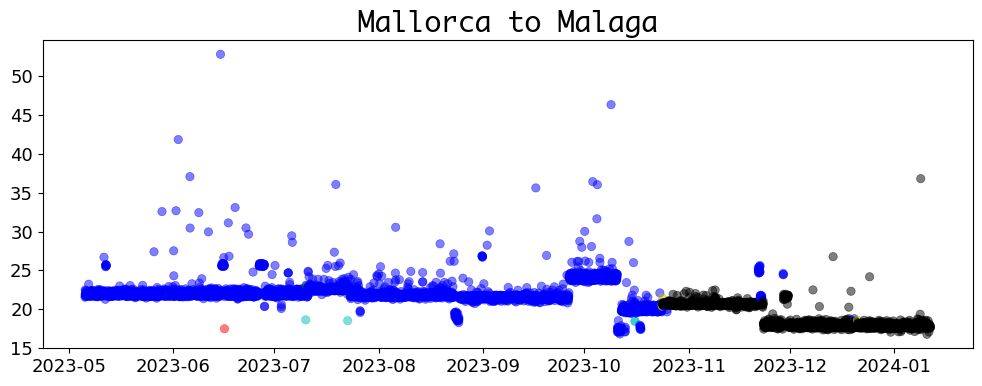

In [15]:
#plot the route
plt.scatter(grouped_ips['new_time'], grouped_ips['last_rtt'], c=grouped_ips['color'],cmap=None, linewidths=0.5, alpha=0.5)

#add title
plt.title('Mallorca to Malaga', **hfont, fontsize=20)

In [16]:
#print unique_hop_ip list for two most common colors 
grouped_ips[grouped_ips['color_id'] == 0]['unique_hop_ip'].iloc[0]

['172.16.30.1',
 '192.168.144.1',
 '81.41.222.5',
 '',
 '',
 '81.41.220.233',
 '',
 '79.145.127.11']

In [17]:
grouped_ips[grouped_ips['color_id'] == 6]['unique_hop_ip'].iloc[0]

['172.16.30.1',
 '192.168.144.1',
 '81.41.222.5',
 '',
 '',
 '81.41.220.241',
 '',
 '79.145.127.11']

### ROUTE THREE 


In [18]:
route3_df = route_df[(route_df['prb_id'] == 51265) & (route_df['dst_id'] == '30381')].copy()
route3_df.head()

,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,dst_names,src_names,Hour,distance,hop,hop_ip,rtt,unique_ips,avg_rtt,last_rtt
90993,5080,2.6.2,64,1683307641,83.51.50.60,83.51.50.60,172.16.30.2,ICMP,4,48,...,Dst_Barcelona,Mallorca,19,187.721025,1,"[172.16.30.1, 172.16.30.1, 172.16.30.1]","[0.798, 0.621, 0.611]",[172.16.30.1],0.676667,14.806667
90993,5080,2.6.2,64,1683307641,83.51.50.60,83.51.50.60,172.16.30.2,ICMP,4,48,...,Dst_Barcelona,Mallorca,19,187.721025,2,"[192.168.144.1, 192.168.144.1, 192.168.144.1]","[1.756, 1.822, 1.782]",[192.168.144.1],1.786667,14.806667
90993,5080,2.6.2,64,1683307641,83.51.50.60,83.51.50.60,172.16.30.2,ICMP,4,48,...,Dst_Barcelona,Mallorca,19,187.721025,3,"[81.41.222.5, 81.41.222.5, 81.41.222.5]","[5.676, 5.84, 5.925]",[81.41.222.5],5.813667,14.806667
90993,5080,2.6.2,64,1683307641,83.51.50.60,83.51.50.60,172.16.30.2,ICMP,4,48,...,Dst_Barcelona,Mallorca,19,187.721025,4,"[None, None, None]","[nan, nan, nan]",[None],NaN,14.806667
90993,5080,2.6.2,64,1683307641,83.51.50.60,83.51.50.60,172.16.30.2,ICMP,4,48,...,Dst_Barcelona,Mallorca,19,187.721025,5,"[None, None, None]","[nan, nan, nan]",[None],NaN,14.806667


In [19]:
#extract the first IP address from the hop_ip column into a new column
route3_df['unique_hop_ip'] = route3_df['hop_ip'].apply(lambda x: next((ip for ip in x if ip is not None), ''))

#count the hops in each index and add it to a route 
route3_df['hop_count'] = route3_df.groupby(route3_df.index)['unique_hop_ip'].transform('count')

grouped_ips = route3_df.groupby(level=0).agg({'unique_hop_ip': list, 'new_time': 'first', 'hop_count':'first', 'last_rtt': 'first'})
grouped_ips['color_id'] = pd.factorize(grouped_ips['unique_hop_ip'].apply(tuple))[0]
grouped_ips['color_id'].nunique()

10

In [20]:
#add a color number to match the number of unique colors needed
grouped_ips['color_id'].value_counts()

color_id
0    5999
2     860
3     339
8      14
6       6
4       5
5       2
1       1
7       1
9       1
Name: count, dtype: int64

In [21]:
#add a color name to each color id

import matplotlib.colors as mcolors

#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = list(colors.keys())


#add a unique color to each color id 
grouped_ips['color'] = grouped_ips['color_id'].apply(lambda x: colors[x])
grouped_ips['color'].nunique()

10

In [22]:
#check mapping of color id to color name 
grouped_ips[['color_id','color']].drop_duplicates()

,color_id,color
90993,0,b
96954,1,g
105099,2,r
105179,3,c
106128,4,m
106551,5,y
109074,6,k
110367,7,w
111615,8,aliceblue
112255,9,antiquewhite


Text(0.5, 1.0, 'Mallorca to Barcelona')

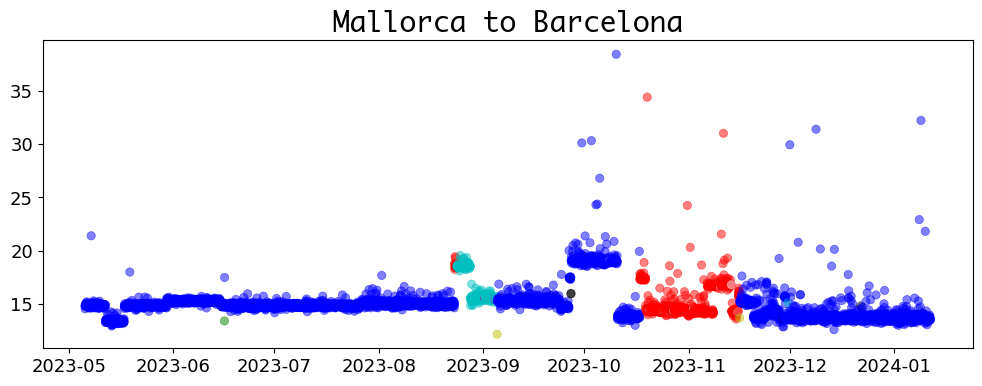

In [23]:
#plot the route
plt.scatter(grouped_ips['new_time'], grouped_ips['last_rtt'], c=grouped_ips['color'],cmap=None, linewidths=0.5, alpha=0.5)

#add title
plt.title('Mallorca to Barcelona', **hfont, fontsize=20)

In [24]:
#print unique_hop_ip list for two most common colors 
grouped_ips[grouped_ips['color_id'] == 0]['unique_hop_ip'].iloc[0]

['172.16.30.1',
 '192.168.144.1',
 '81.41.222.5',
 '',
 '',
 '81.46.44.38',
 '81.46.34.214',
 '83.51.50.60']

In [25]:
#print unique_hop_ip list for two most common colors 
grouped_ips[grouped_ips['color_id'] == 2]['unique_hop_ip'].iloc[0]

['172.16.30.1',
 '192.168.144.1',
 '81.41.222.5',
 '81.41.222.242',
 '80.58.96.150',
 '81.46.44.42',
 '81.46.34.214',
 '83.51.50.60']

In [26]:
#print unique_hop_ip list for two most common colors 
grouped_ips[grouped_ips['color_id'] == 3]['unique_hop_ip'].iloc[0]

['172.16.30.1',
 '192.168.144.1',
 '81.41.222.5',
 '81.41.222.242',
 '80.58.96.150',
 '81.46.44.46',
 '81.46.34.218',
 '83.51.50.60']